<a href="https://colab.research.google.com/github/jposyluzny/ENEL645/blob/main/Lectures/Week%203/MNISTDigitsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step-by-step MNIST Digits Classification - Fully Connected Neural Networks
1. Load dataset, explore it (display images, mean, min, max values, etc.) and split it into train, validation and test sets
2. Data scaling
3. One hot encoding
4. Define your model, cost function, optimizer, learning rate
5. Define your callbacks (save your model, patience, etc.)
6. Train your model
 <br> 6.1 If you are satisfied with the train and validation performance go to the next step
  <br> 6.2 If you are not satisfied with the train and validation performance go back to step 4

7. Test your model on the test and extract relevant metrics

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf

## 1. Load dataset, explore it (display images, mean, min, max values, etc.) and split it into train, validation and test sets

In [7]:
(X_dev, y_dev), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Development set")
print(X_dev.shape)
print(np.unique(y_dev).size) # of classes
print(np.unique(y_dev))
print("Test set")
print(X_test.shape)
print(y_test.shape)

Development set
(60000, 28, 28)
10
[0 1 2 3 4 5 6 7 8 9]
Test set
(10000, 28, 28)
(10000,)


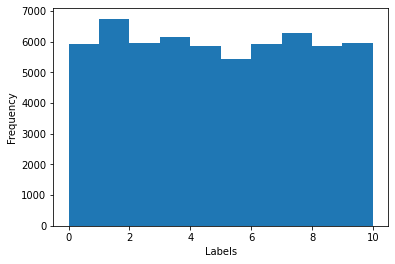

In [9]:
plt.figure()
plt.hist(y_dev,bins=range(11))
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

In [10]:
indexes = np.arange(y_dev.size, dtype=int)
np.random.shuffle(indexes)
X_dev = X_dev[indexes]
y_dev = y_dev[indexes]

nsplit = int(0.75*y_dev.size)

X_train = X_dev[:nsplit]
y_train = y_dev[:nsplit]

X_val = X_dev[nsplit:]
y_val = y_dev[nsplit:]

print(X_train.shape)
print(X_val.shape)

(45000, 28, 28)
(15000, 28, 28)


In [11]:
print(X_train.min(), X_train.max(), X_train.mean(), X_train.std())
print(X_val.min(), X_val.max(), X_val.mean(), X_val.std())

0 255 33.30490189909297 78.56108242124807
0 255 33.35898010204082 78.58669558030742


## 2. Data Scaling

In [12]:
norm_type = 0 # 0 == min-max normalization; 1 == standardization (mean/std)

if norm_type == 0:
  X_train = X_train/255
  X_val = X_val/255
  X_test = X_test/255

elif norm_type == 1:
  train_mean = X_train.mean()
  train_std = X_train.std()
  X_train = (X_train - train_mean) / train_std
  X_val = (X_val - train_mean)/train_std
  X_test = (X_test - train_mean)/train_std

else:
  pass

## 3. One hot encoding

In [14]:
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_val_oh = tf.keras.utils.to_categorical(y_val)
y_test_oh = tf.keras.utils.to_categorical(y_test)

print(y_train[:5])
print()
print(y_train_oh[:5])

[4 9 5 2 4]

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 4. Define your model, cost function, optimizer, learning rate

In [15]:
def my_model(ishape=(28,28), k=10, lr=1e-4):

  model_input = tf.keras.layers.Input(shape=ishape)
  model_input_flatten = tf.keras.layers.Flatten()(model_input) # converts image to flat representation of the image
  out = tf.keras.layers.Dense(k, activation = 'softmax')(model_input_flatten)

  model = tf.keras.models.Model(inputs = model_input, outputs = out)
  model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

## 5. Define your callbacks (save your model, patience, etc)

In [16]:
model_name = 'best_model_mnist.h5'

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20) # patience is the amount of epochs the model can train without improving before training is interrupted

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', save_best_only=True, save_weights_only=True)

def scheduler(epoch, lr):
  if epoch%10 == 0:
    lr = lr/2
  return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

## 6. Train your model

In [19]:
model = my_model()

model.fit(X_train, y_train_oh, batch_size=32, epochs=200, verbose=1, callbacks=[early_stop, monitor, lr_schedule], validation_data = (X_val, y_val_oh), shuffle=True) # the number of samples we use to estimate the gradient before doing one step when doing gradient descent optimization. We should always shuffle samples between epochs

Epoch 1/200
1407/1407 [==============================] - 3s 2ms/step - loss: 1.8751 - accuracy: 0.4379 - val_loss: 1.1033 - val_accuracy: 0.8003
Epoch 2/200
1407/1407 [==============================] - 3s 2ms/step - loss: 0.9903 - accuracy: 0.8130 - val_loss: 0.7576 - val_accuracy: 0.8395
Epoch 3/200
1407/1407 [==============================] - 3s 2ms/step - loss: 0.7066 - accuracy: 0.8488 - val_loss: 0.6083 - val_accuracy: 0.8581
Epoch 4/200
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5822 - accuracy: 0.8633 - val_loss: 0.5273 - val_accuracy: 0.8699
Epoch 5/200
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5102 - accuracy: 0.8738 - val_loss: 0.4771 - val_accuracy: 0.8795
Epoch 6/200
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4608 - accuracy: 0.8845 - val_loss: 0.4436 - val_accuracy: 0.8852
Epoch 7/200
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4315 - accuracy: 0.8892 - val_loss: 0.4199 - val_ac

## 7. Test your model on the test and extract relevant metrics

In [22]:
model.load_weights(model_name)
metrics = model.evaluate(X_test, y_test_oh)
print("Categorical cross-entropy:", metrics[0])
print("Accuracy:", metrics[1])

313/313 [==============================] - 0s 924us/step - loss: 0.3092 - accuracy: 0.9159
Categorical cross-entropy: 0.30919763445854187
Accuracy: 0.9158999919891357


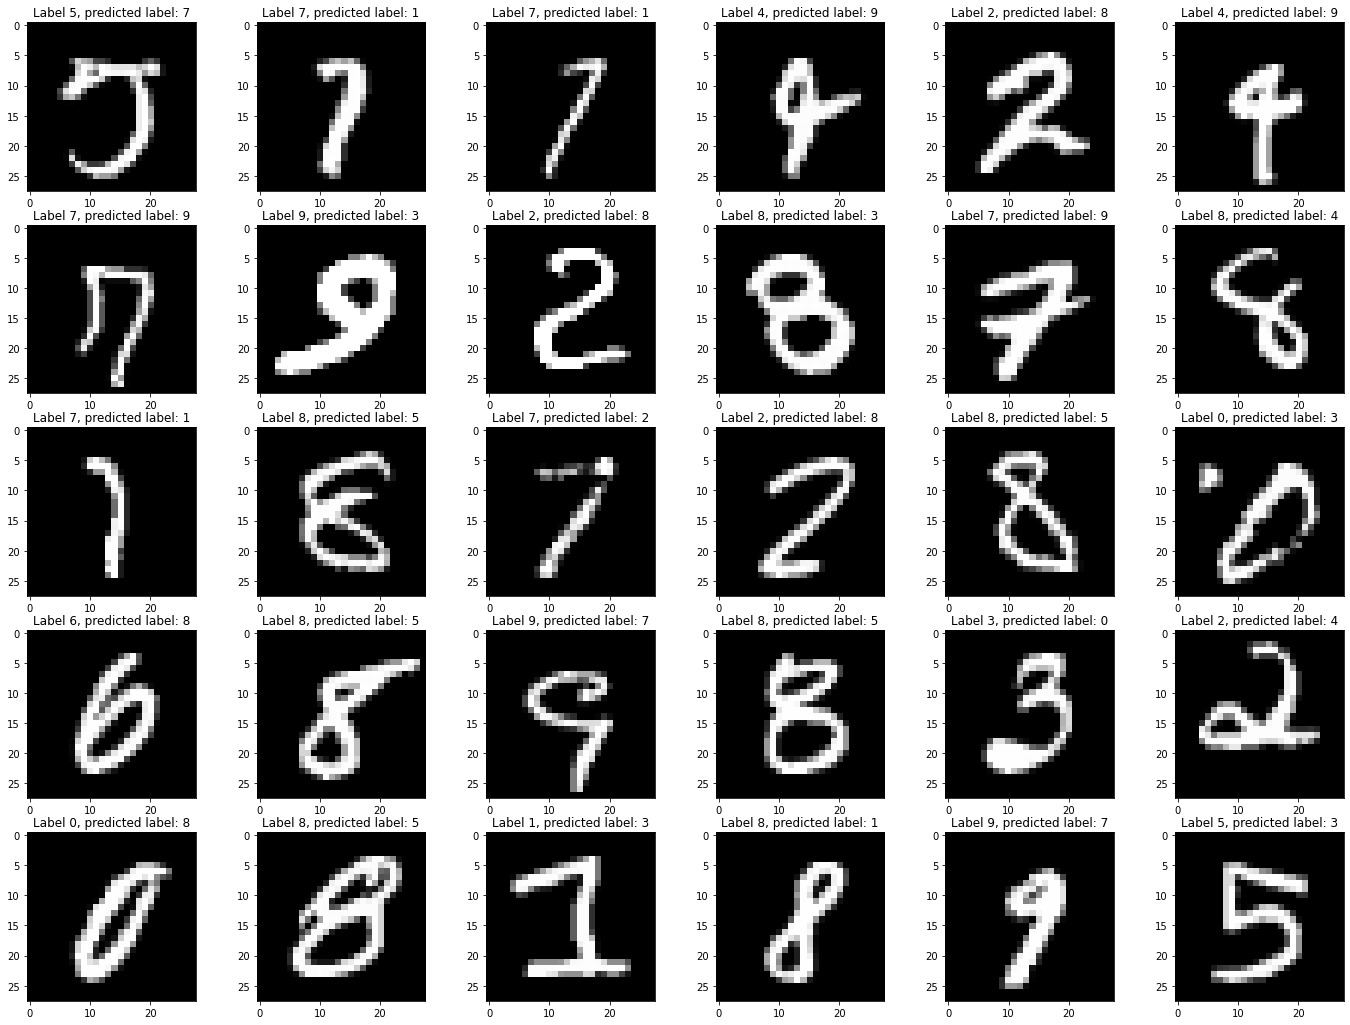

In [26]:
y_pred = model.predict(X_test).argmax(axis=1)
wrong_indexes = np.where(y_pred != y_test)[0]
sample_indexes = np.random.choice(np.arange(wrong_indexes.size, dtype=int), size=30, replace=False) # replace = False means we won't get duplicate values
plt.figure(figsize=(24,18))
for (ii,jj) in enumerate(sample_indexes):
  plt.subplot(5,6, ii+1)
  plt.imshow(X_test[wrong_indexes[jj]], cmap='gray')
  plt.title("Label %d, predicted label: %d" %(y_test[wrong_indexes[jj]], y_pred[wrong_indexes[jj]]))